In [6]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

In [7]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import pandas as pd

raw_data = data.raw_ratings
df = pd.DataFrame(raw_data, columns=['user', 'item', 'rating', 'timestamp'])

## Exploratory Data Analysis

In [9]:
# Define a Reader object to parse the ratings
reader = Reader(rating_scale=(1, 5))

# Load the dataset again with the defined Reader
data = Dataset.load_from_df(df[['user', 'item', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Get the number of users and items in the training set
num_users_train = trainset.n_users
num_items_train = trainset.n_items

print(f'Number of users in the training set: {num_users_train}')
print(f'Number of items in the training set: {num_items_train}')


Number of users in the training set: 943
Number of items in the training set: 1644


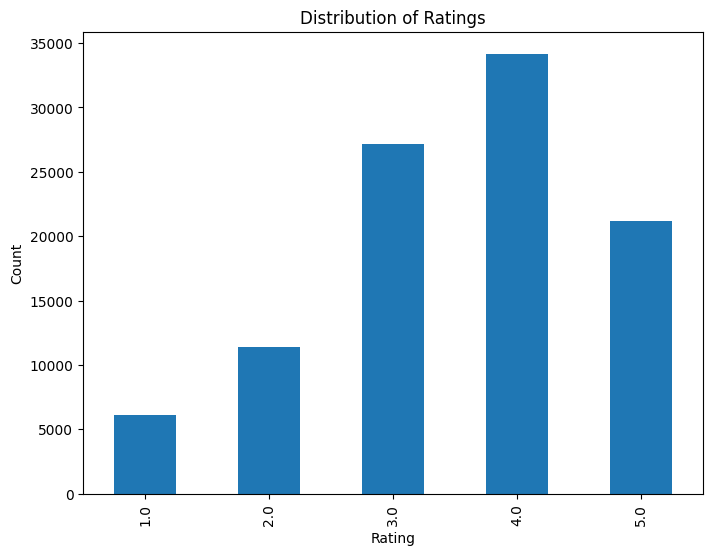

In [10]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


### We can definitely notice a class imbalance in the reviews as well as the skewdness of the Review Counts Per Movie

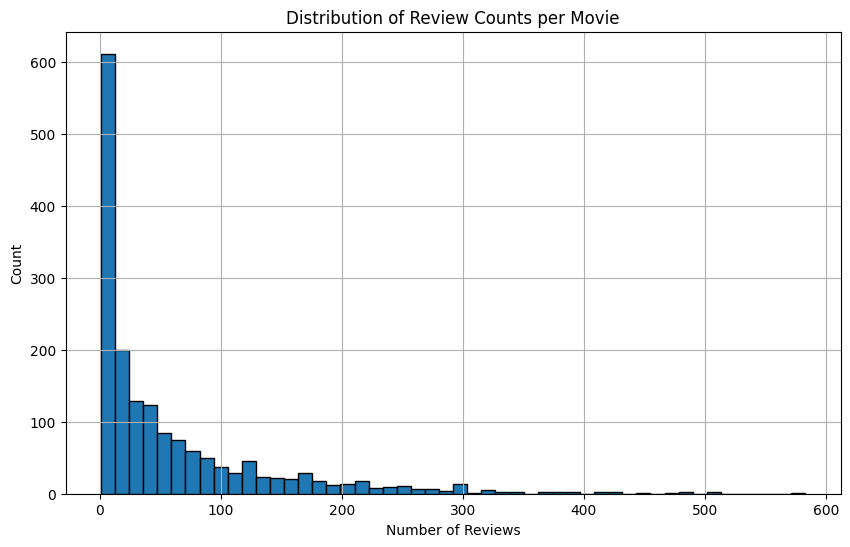

In [11]:
# Calculate review counts per movie
review_counts = df['item'].value_counts()

# Plot the distribution of review counts
plt.figure(figsize=(10, 6))
plt.hist(review_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title('Distribution of Review Counts per Movie')
plt.grid(True)
plt.show()


## Working with ML Models (Surprise Library)

In [12]:
from surprise import accuracy

def evaluate_model(algo, trainset, testset):
    """
    Train and evaluate a Surprise algorithm on given datasets.
    
    Args:
    algo: A Surprise algorithm object
    trainset: Surprise Trainset object
    testset: Surprise Testset object
    
    Returns:
    train_rmse, train_mae, test_rmse, test_mae: Evaluation metrics
    """
    # Train the algorithm
    algo.fit(trainset)
    
    # Evaluate on training data
    train_predictions = algo.test(trainset.build_testset())
    train_rmse = accuracy.rmse(train_predictions)
    train_mae = accuracy.mae(train_predictions)
    
    # Evaluate on test data
    test_predictions = algo.test(testset)
    test_rmse = accuracy.rmse(test_predictions)
    test_mae = accuracy.mae(test_predictions)
    
    return train_rmse, train_mae, test_rmse, test_mae


In [13]:
from surprise import KNNBaseline

# Define custom parameters for KNNBaseline
knn_params_custom = {
    'k': 40,
    'min_k': 1,
    'sim_options': {
        'name': 'pearson_baseline',
        'user_based': False
    }
}

# Initialize KNNBaseline with custom parameters
knn_baseline_custom = KNNBaseline(**knn_params_custom)

# Evaluate KNNBaseline with custom parameters
train_rmse, train_mae, test_rmse, test_mae = evaluate_model(knn_baseline_custom, trainset, testset)

print(f'KNN Baseline Custom Parameters - Train RMSE: {train_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Train MAE: {train_mae:.4f}')
print(f'KNN Baseline Custom Parameters - Test RMSE: {test_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Test MAE: {test_mae:.4f}')


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4063
MAE:  0.3074
RMSE: 0.9238
MAE:  0.7230
KNN Baseline Custom Parameters - Train RMSE: 0.4063
KNN Baseline Custom Parameters - Train MAE: 0.3074
KNN Baseline Custom Parameters - Test RMSE: 0.9238
KNN Baseline Custom Parameters - Test MAE: 0.7230


In [14]:
from surprise import KNNBaseline

# Define custom parameters for KNNBaseline
knn_params_custom = {
    'k': 100,
    'min_k': 1,
    'sim_options': {
        'name': 'pearson_baseline',
        'user_based': False
    }
}

# Initialize KNNBaseline with custom parameters
knn_baseline_custom = KNNBaseline(**knn_params_custom)

# Evaluate KNNBaseline with custom parameters
train_rmse, train_mae, test_rmse, test_mae = evaluate_model(knn_baseline_custom, trainset, testset)

print(f'KNN Baseline Custom Parameters - Train RMSE: {train_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Train MAE: {train_mae:.4f}')
print(f'KNN Baseline Custom Parameters - Test RMSE: {test_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Test MAE: {test_mae:.4f}')


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4360
MAE:  0.3292
RMSE: 0.9244
MAE:  0.7242
KNN Baseline Custom Parameters - Train RMSE: 0.4360
KNN Baseline Custom Parameters - Train MAE: 0.3292
KNN Baseline Custom Parameters - Test RMSE: 0.9244
KNN Baseline Custom Parameters - Test MAE: 0.7242


In [15]:
from surprise import KNNBaseline

# Define custom parameters for KNNBaseline
knn_params_custom = {
    'k': 30,
    'min_k': 1,
    'sim_options': {
        'name': 'pearson_baseline',
        'user_based': True
    }
}

# Initialize KNNBaseline with custom parameters
knn_baseline_custom = KNNBaseline(**knn_params_custom)

# Evaluate KNNBaseline with custom parameters
train_rmse, train_mae, test_rmse, test_mae = evaluate_model(knn_baseline_custom, trainset, testset)

print(f'KNN Baseline Custom Parameters - Train RMSE: {train_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Train MAE: {train_mae:.4f}')
print(f'KNN Baseline Custom Parameters - Test RMSE: {test_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Test MAE: {test_mae:.4f}')


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.3830
MAE:  0.2855
RMSE: 0.9271
MAE:  0.7244
KNN Baseline Custom Parameters - Train RMSE: 0.3830
KNN Baseline Custom Parameters - Train MAE: 0.2855
KNN Baseline Custom Parameters - Test RMSE: 0.9271
KNN Baseline Custom Parameters - Test MAE: 0.7244


In [16]:
from surprise import KNNBaseline

# Define custom parameters for KNNBaseline
knn_params_custom = {
    'k': 50,
    'min_k': 1,
    'sim_options': {
        'name': 'pearson_baseline',
        'user_based': True
    }
}

# Initialize KNNBaseline with custom parameters
knn_baseline_custom = KNNBaseline(**knn_params_custom)

# Evaluate KNNBaseline with custom parameters
train_rmse, train_mae, test_rmse, test_mae = evaluate_model(knn_baseline_custom, trainset, testset)

print(f'KNN Baseline Custom Parameters - Train RMSE: {train_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Train MAE: {train_mae:.4f}')
print(f'KNN Baseline Custom Parameters - Test RMSE: {test_rmse:.4f}')
print(f'KNN Baseline Custom Parameters - Test MAE: {test_mae:.4f}')


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4115
MAE:  0.3060
RMSE: 0.9262
MAE:  0.7242
KNN Baseline Custom Parameters - Train RMSE: 0.4115
KNN Baseline Custom Parameters - Train MAE: 0.3060
KNN Baseline Custom Parameters - Test RMSE: 0.9262
KNN Baseline Custom Parameters - Test MAE: 0.7242


We can notice that user and items similarity do not influence the predictions of KNNBaseline model much.

In [18]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Parameters dictionary for SVD algorithm
svd_params_custom = {
    'n_factors': 100,
    'n_epochs': 20,
    'lr_all': 0.005,
    'reg_all': 0.02
}


# Initialize SVD algorithm with custom parameters
svd = SVD(**svd_params_custom)
train_rmse, train_mae, test_rmse, test_mae = evaluate_model(knn_baseline_custom, trainset, testset)

print(f'SVD - Train RMSE: {train_rmse:.4f}')
print(f'SVD - Train MAE: {train_mae:.4f}')
print(f'SVD- Test RMSE: {test_rmse:.4f}')
print(f'SVD - Test MAE: {test_mae:.4f}')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4115
MAE:  0.3060
RMSE: 0.9262
MAE:  0.7242
SVD - Train RMSE: 0.4115
SVD - Train MAE: 0.3060
SVD- Test RMSE: 0.9262
SVD - Test MAE: 0.7242


In [19]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Parameters dictionary for SVD algorithm
svd_params_custom = {
    'n_factors': 200,
    'n_epochs': 50,
    'lr_all': 0.001,
    'reg_all': 0.05
}


# Initialize SVD algorithm with custom parameters
svd = SVD(**svd_params_custom)
train_rmse, train_mae, test_rmse, test_mae = evaluate_model(knn_baseline_custom, trainset, testset)

print(f'SVD - Train RMSE: {train_rmse:.4f}')
print(f'SVD - Train MAE: {train_mae:.4f}')
print(f'SVD- Test RMSE: {test_rmse:.4f}')
print(f'SVD - Test MAE: {test_mae:.4f}')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4115
MAE:  0.3060
RMSE: 0.9262
MAE:  0.7242
SVD - Train RMSE: 0.4115
SVD - Train MAE: 0.3060
SVD- Test RMSE: 0.9262
SVD - Test MAE: 0.7242


Surprisingly, SVD performs as bad as KNNBaseline!